<a href="https://colab.research.google.com/github/MoreenMarutaData/UNSUPERVISED-ANALYSIS-OF-CARREFOUR-KENYA/blob/main/ANOMALY_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining the question

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

In [5]:
install.packages("anomalize")
library("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [6]:
df<- read.csv("http://bit.ly/CarreFourSalesDataset")
df

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165
2/25/2019,433.6920
2/24/2019,772.3800
1/10/2019,76.1460


In [7]:
head(df, 4)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480


In [8]:
tail(df, 3)

,Date,Sales
,<chr>,<dbl>
998,2/9/2019,33.432
999,2/22/2019,69.111
1000,2/18/2019,649.299


In [9]:
dim(df)

[1] 1000    2

In [10]:
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [11]:
names(df)<- tolower(names(df))
names(df)

[1] "date"  "sales"

In [12]:
df$date <- as.Date(df$date, format = "%m/%d/%y")
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ date : Date, format: "2020-01-05" "2020-03-08" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...


lets sum the sales by dates

In [13]:
df<- aggregate(df$sales, by=list(date<-df$date), sum)

In [14]:
names(df)

[1] "Group.1" "x"

rename the columns using indexes

In [15]:
names(df)[1]<- "date"
names(df)[2]<- "total.sales"

In [16]:
names(df)

[1] "date"        "total.sales"

In [17]:
head(df)

,date,total.sales
,<date>,<dbl>
1,2020-01-01,4745.181
2,2020-01-02,1945.503
3,2020-01-03,2078.128
4,2020-01-04,1623.688
5,2020-01-05,3536.684
6,2020-01-06,3614.205


In [18]:
dim(df)

[1] 89  2

the rows reduced to 89 from a 1000

In [19]:
colSums(is.na(df))

date total.sales 
          0           0

no missing values present

In [20]:
sum(duplicated(df))

[1] 0

no duplicates in the data

In [21]:
summary(df)

      date             total.sales    
 Min.   :2020-01-01   Min.   : 934.2  
 1st Qu.:2020-01-23   1st Qu.:2444.5  
 Median :2020-02-14   Median :3163.2  
 Mean   :2020-02-14   Mean   :3628.8  
 3rd Qu.:2020-03-08   3rd Qu.:4745.2  
 Max.   :2020-03-30   Max.   :7474.0  

In [22]:
install.packages("tibble")
install.packages("dplyr")
library(tibble)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
df1<- as_tibble(df)

In [25]:
is_tibble(df1)

[1] TRUE

Converting from tbl_df to tbl_time.
Auto-index message: index = date

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



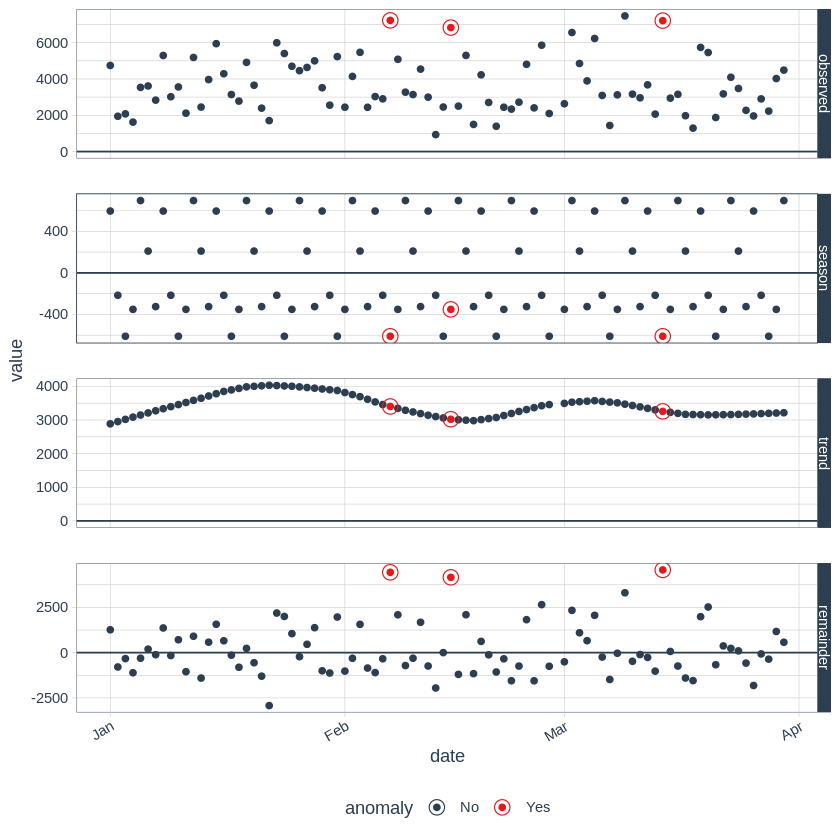

In [31]:
 #find and plot anomalies in the data
df1 %>%
 time_decompose(total.sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
 anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>% 
 plot_anomaly_decomposition()

there are some anomalies. We could try removing the outliers and see what happens